In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# === Caminhos ===
RESULTADOS_DIR = Path("Resultados/")

# === Configurações de visualização ===
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

In [3]:
# === 1️⃣ Carregar base final ===
print("📂 Carregando base de modelagem...\n")
df = pd.read_parquet(RESULTADOS_DIR / "Base_Modelagem.parquet", engine="fastparquet")
print(f"✅ {len(df):,} registros e {df.shape[1]} colunas carregadas.\n")

display(df.head(5))

📂 Carregando base de modelagem...

✅ 654 registros e 37 colunas carregadas.



,netflix_title,imdb_title,match_score,startYear,runtimeMinutes,averageRating,numVotes,genres,idade_titulo,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_Unknown,genre_War,type_tvMovie,type_tvSeries,assistido
0,doom at your service,doom at your service,1.0,2021,65.0,7.8,10596.0,"[Drama, Fantasy, Romance]",4,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,1
1,brooklyn ninenine,brooklyn ninenine,1.0,2013,22.0,8.4,403619.0,"[Comedy, Crime]",12,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1
2,love next door,love next door,1.0,2024,60.0,7.6,9330.0,"[Comedy, Romance]",1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,1
3,romantics anonymous,romantics anonymous,1.0,2010,80.0,6.9,12410.0,"[Comedy, Romance]",15,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1
4,beyond the bar,beyond the bar,1.0,2025,60.0,7.9,3752.0,[Drama],0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1


In [4]:
# === 2️⃣ Estatísticas gerais ===
print("📊 Estatísticas descritivas (variáveis numéricas):")
display(df.describe().T)

📊 Estatísticas descritivas (variáveis numéricas):


,count,mean,std,min,25%,50%,75%,max
match_score,654.0,0.993082,0.033544,0.754717,1.0,1.0,1.00,1.0
startYear,654.0,2015.003058,8.725172,1938.000000,2012.0,2018.0,2021.00,2025.0
runtimeMinutes,654.0,59.908257,37.732444,-1.000000,30.0,50.5,92.00,172.0
averageRating,654.0,7.171407,1.048689,2.300000,6.5,7.3,7.90,9.5
numVotes,654.0,119449.897554,250512.952299,8.000000,4481.5,22670.0,115879.75,2413272.0
idade_titulo,654.0,9.996942,8.725172,0.000000,4.0,7.0,13.00,87.0
assistido,654.0,1.000000,0.000000,1.000000,1.0,1.0,1.00,1.0


In [5]:
print("🔢 Colunas categóricas:")
display(df.select_dtypes(include="uint8").columns.tolist())

🔢 Colunas categóricas:


[]

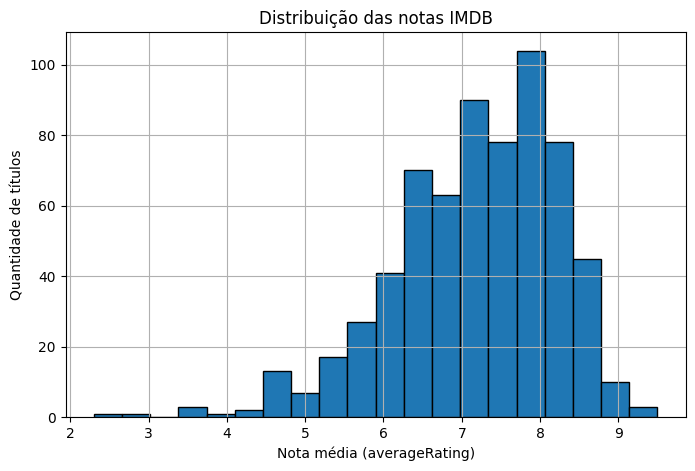

In [6]:
# === 3️⃣ Distribuição das notas IMDB ===
plt.figure()
df["averageRating"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Distribuição das notas IMDB")
plt.xlabel("Nota média (averageRating)")
plt.ylabel("Quantidade de títulos")
plt.show()

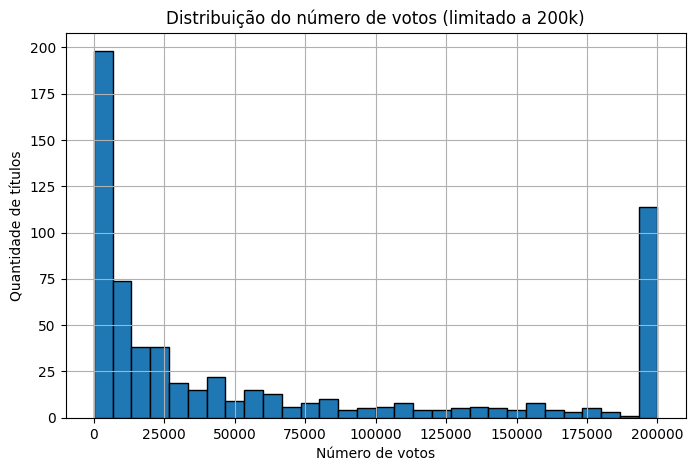

In [7]:
# === 4️⃣ Distribuição do número de votos ===
plt.figure()
df["numVotes"].apply(lambda x: min(x, 200000)).plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribuição do número de votos (limitado a 200k)")
plt.xlabel("Número de votos")
plt.ylabel("Quantidade de títulos")
plt.show()

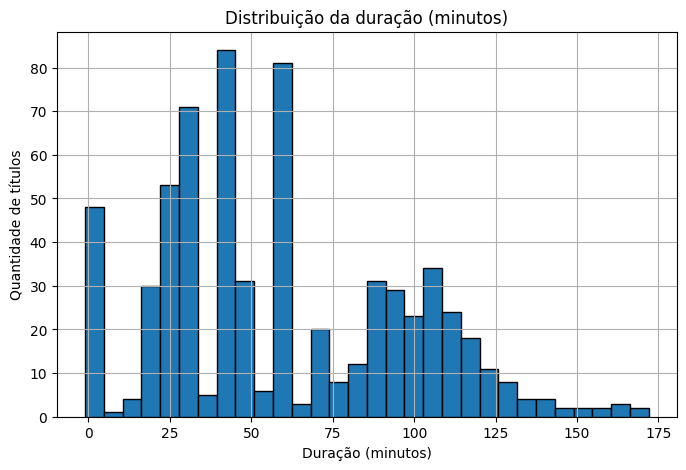

In [8]:
# === 5️⃣ Distribuição da duração (runtimeMinutes) ===
plt.figure()
df["runtimeMinutes"].apply(lambda x: min(x, 300)).plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribuição da duração (minutos)")
plt.xlabel("Duração (minutos)")
plt.ylabel("Quantidade de títulos")
plt.show()

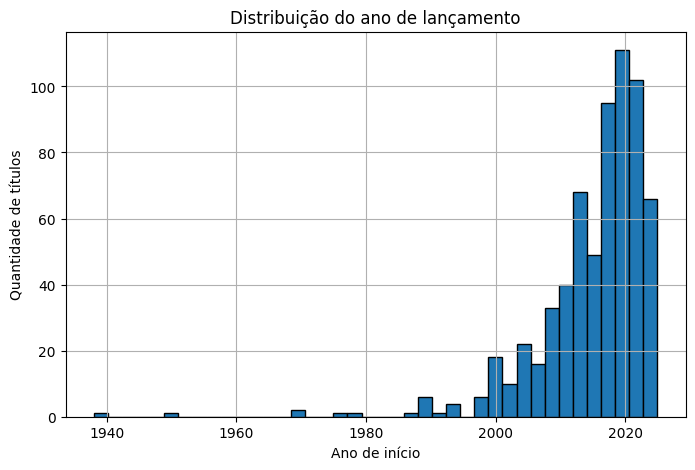

In [9]:
# === 6️⃣ Distribuição do ano de lançamento ===
plt.figure()
df["startYear"].replace(-1, pd.NA).dropna().plot(kind="hist", bins=40, edgecolor="black")
plt.title("Distribuição do ano de lançamento")
plt.xlabel("Ano de início")
plt.ylabel("Quantidade de títulos")
plt.show()

In [10]:
# === 7️⃣ Análise por tipo de título ===
cols_tipo = [c for c in df.columns if c.startswith("type_")]
print("📺 Contagem por tipo de título:")
display(df[cols_tipo].sum().sort_values(ascending=False))

📺 Contagem por tipo de título:


type_tvSeries    443
type_tvMovie       7
dtype: int64

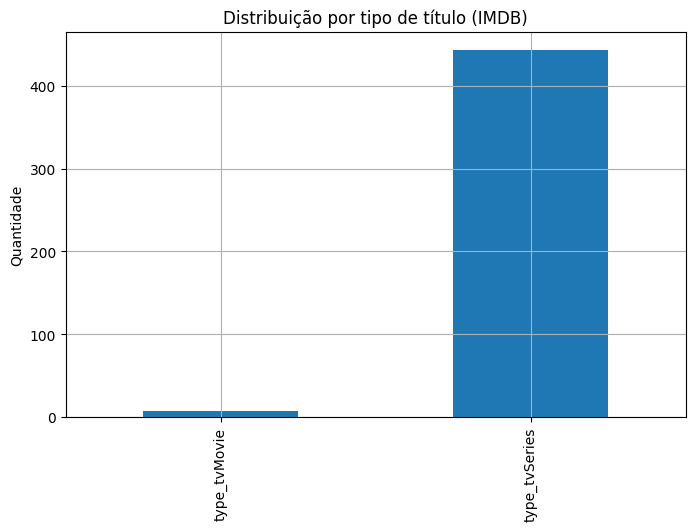

In [11]:
df[cols_tipo].sum().plot(kind="bar")
plt.title("Distribuição por tipo de título (IMDB)")
plt.ylabel("Quantidade")
plt.show()

In [12]:
# === 8️⃣ Análise por gênero ===
cols_genres = [c for c in df.columns if c.startswith("genre_")]
print("🎭 Contagem por gênero:")
display(df[cols_genres].sum().sort_values(ascending=False).head(15))

🎭 Contagem por gênero:


genre_Drama          341
genre_Comedy         333
genre_Romance        164
genre_Adventure       98
genre_Animation       92
genre_Crime           86
genre_Fantasy         57
genre_Reality-TV      47
genre_Mystery         41
genre_Documentary     34
genre_Family          27
genre_Thriller        25
genre_Game-Show       17
genre_Music           16
genre_Horror          15
dtype: int64

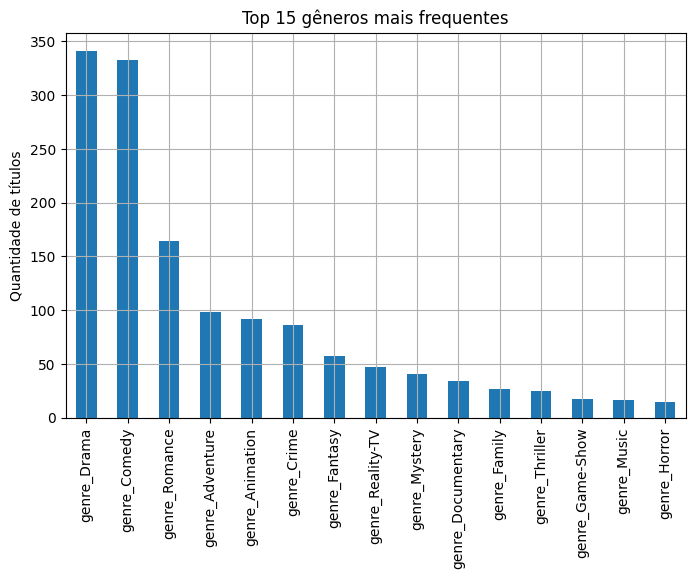

In [13]:
df[cols_genres].sum().sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Top 15 gêneros mais frequentes")
plt.ylabel("Quantidade de títulos")
plt.show()

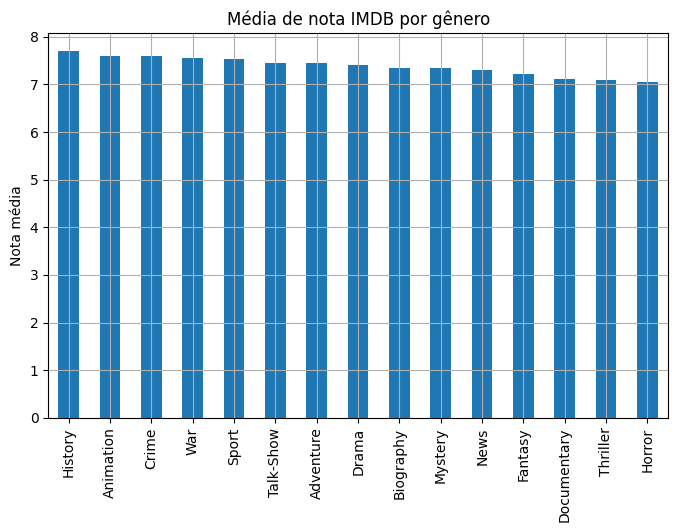

In [14]:
# === 9️⃣ Relação entre nota média e gênero ===
genres_avg = {
    col.replace("genre_", ""): df.loc[df[col] == 1, "averageRating"].mean()
    for col in cols_genres
}
pd.Series(genres_avg).sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Média de nota IMDB por gênero")
plt.ylabel("Nota média")
plt.show()

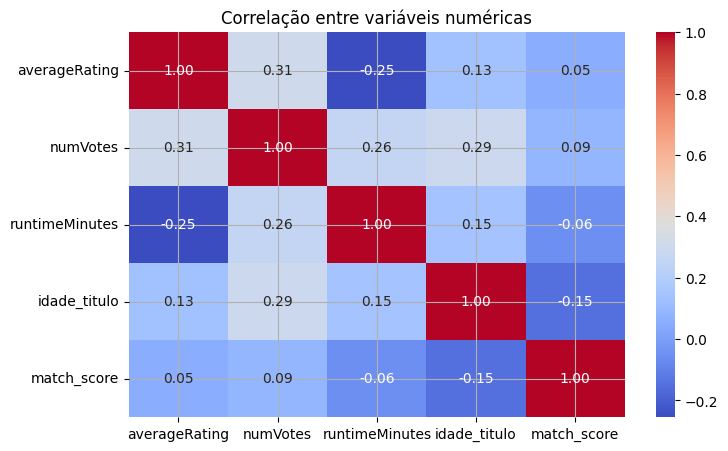

In [15]:
# === 🔟 Correlação entre variáveis numéricas ===
num_cols = ["averageRating", "numVotes", "runtimeMinutes", "idade_titulo", "match_score"]
corr = df[num_cols].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis numéricas")
plt.show()

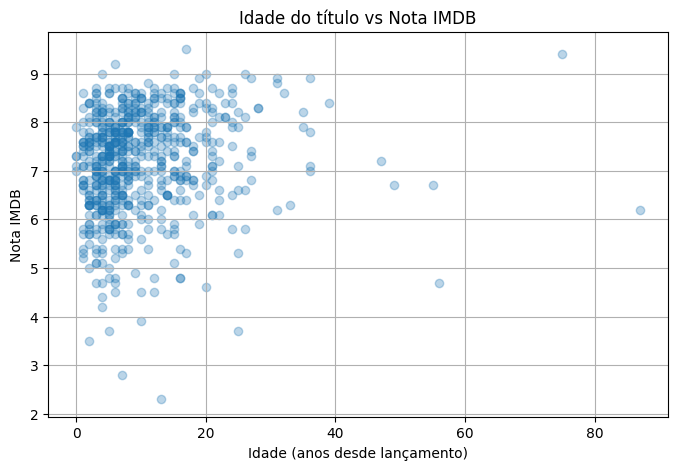

In [16]:
# === 11️⃣ Relação entre idade do título e nota ===
plt.figure()
plt.scatter(df["idade_titulo"], df["averageRating"], alpha=0.3)
plt.title("Idade do título vs Nota IMDB")
plt.xlabel("Idade (anos desde lançamento)")
plt.ylabel("Nota IMDB")
plt.show()

In [17]:
# === 12️⃣ Top títulos com maior match_score e nota ===
print("🏆 Top 10 títulos com melhor match e nota IMDB:")
display(
    df.sort_values(["match_score", "averageRating"], ascending=False)[
        ["netflix_title", "imdb_title", "averageRating", "match_score", "numVotes"]
    ].head(10)
)

🏆 Top 10 títulos com melhor match e nota IMDB:


,netflix_title,imdb_title,averageRating,match_score,numVotes
267,breaking bad,breaking bad,9.5,1.0,2413272.0
281,formula 1,formula 1,9.4,1.0,3791.0
203,our planet,our planet,9.2,1.0,58689.0
23,the office,the office,9.0,1.0,798484.0
117,arcane,arcane,9.0,1.0,416758.0
139,one piece,one piece,9.0,1.0,327283.0
639,sherlock,sherlock,9.0,1.0,1064769.0
173,seinfeld,seinfeld,8.9,1.0,375084.0
212,death note,death note,8.9,1.0,447573.0
384,cowboy bebop,cowboy bebop,8.9,1.0,159982.0
